# Dataset

CIFAR10 open source dataset is used. 
dataset link- https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
It has 60000 color images with 10 classes, with 6000 images per class. 50000 training images and 10000 test images.
The dataset size is 177 MB. Here are the classes in the dataset 
Airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
Data type is a dictionary and there are 4 labels- dict_keys('batch_label', 'labels','data','filenames']), among these, column 'labels' & 'data' are important features. 'data' consists of an array shape of images & 'labels' contains true labels. 
There is one meta data file which has below information-
num_cases_per_batch 10000
label_names ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']




In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#unpickle file function
def unpickle(fileName):
    with open(fileName, 'rb') as f:
        dict = pickle.load(f, encoding='latin1')
    return dict


Total images- 10000

Total categories - 10

Total dimensions- each image has 3072 dimensions i.e. 32 * 32 * 3 (length * width * RGB channel) 

In [ ]:
meta_data = r'/content/drive/MyDrive/Colab_Notebooks/Project_2/cifar-10-batches-py/batches.meta'
meta_data_extract= unpickle(meta_data)

for k,v in meta_data_extract.items():
  print(k,v)

num_cases_per_batch 10000
label_names ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_vis 3072


In [ ]:
#There are total 7 files inside dataset- 5 training, 1 test & one metadata , lets load a training file from path & unpickle into a variable
filename= r'/content/drive/MyDrive/Colab_Notebooks/Project_2/cifar-10-batches-py/data_batch_1'
data_batch_1 = unpickle(filename)


In [ ]:
#Lets see items inside a a training data file
for item in data_batch_1:
    print(item, type(data_batch_1[item]))

for k,v in data_batch_1.items():
  print(k,v)

batch_label <class 'str'>
labels <class 'list'>
data <class 'numpy.ndarray'>
filenames <class 'list'>
batch_label training batch 1 of 5
labels [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5

In [ ]:
# Defining array. Each item of array represent integer value of labels. 
class_names =['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print(class_names)

['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


# Loading the whole dataset-

The CIFAR-10 is divided into training set of 5 batches having 10000 labels each & a training set with 10000 labels. With below code, Training dataset can be fetched collectively.
Among all columns , we are interested in 'data' & 'label' column from training dataset


In [ ]:
# collective_training_set function to extract & load all training images &  corresponding lables
def collective_training_set():
    
    for i in range(0,5):
        fileName = '/content/drive/MyDrive/Colab_Notebooks/Project_2/cifar-10-batches-py' + '/data_batch_' + str(i + 1)
        data = unpickle(fileName)
        if i == 0:
            features = data['data']
            labels = np.array(data['labels'])
        else:
            features = np.append(features, data['data'], axis=0)
            labels = np.append(labels, data['labels'])
    return features,labels
    

features,labels = collective_training_set() 


In [ ]:
features.shape

(50000, 3072)

After merging the datset batches, The dataset is found to be  completely balanced with each category having 5000 labels each 

In [ ]:
print(len(labels))
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

50000


{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

# Reshape of Dataset
The image is of type ndarray & shape 3, 32,32 , lets reshape itin order to visualize images & preprocess them for modelling

In [ ]:
features = features.reshape((len(features), 3, 32, 32)).transpose(0, 2, 3, 1)
print(features[0])
print(len(features))
features.shape

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
50000


(50000, 32, 32, 3)

# Understanding how reshape & transpose works on single image -
The original batch data is a numpy array with the dimensions (10000 x 3072) of a dimensional tensor, where the column count (10000) represents the number of sample data. The row vector (3072), as indicated in the CIFAR-10/CIFAR-100 dataset, depicts a colour image with a 32x32 pixel size. The row vector (3072), which will be used in this project to perform the classification tasks, is an inappropriate type of image data to feed. The dimensions of the tensor representing an image data should be either (num channel x width x height) or (num channel x width x height) in order to input the data into an NN model.

Our image data is a numpy ndarray.

Each image is a 1-D array having 3,072 entries. First 1024 entries for Red, then next 1024 are Green and lastly 1024 entries are Blue channels. In order to visualise the images we have to change the shape of image as (32,32,3).

Reshape And Transpose a Single Image
Our image is a single dimension array of size 3072. First 1024 entries of the array are of Red channel, next 1024 entries are of Green channel, and last 1024 entries are of Blue channel. Total 3072 entries are of three RGB channels. 

First we reshape the image/ array into (3,32,32) using image.reshape(3,32,32). (32,32) for 32x32 =1024 entries and 3 for RGB channels.

In [ ]:
image = features[0]
image = image.reshape(3,32,32)
print(image.shape)
print(type(image))

(3, 32, 32)
<class 'numpy.ndarray'>


Next we transpose the reshaped image to get the image of shape (32,32,3). We use image.transpose(1,2,0).


In [ ]:
image = image.transpose(1,2,0)
print(image.shape)

(32, 32, 3)


#loading features & lables into X_train & y_train

In [ ]:

X_train = features
print("Shape before reshape:", X_train.shape)
y_train = labels
print("Shape after reshape and transpose:", X_train.shape)
print(labels)
print(type(y_train),y_train.shape)

Shape before reshape: (50000, 32, 32, 3)
Shape after reshape and transpose: (50000, 32, 32, 3)
[6 9 9 ... 9 1 1]
<class 'numpy.ndarray'> (50000,)


In [ ]:
print(X_train[0].shape,X_train[0])

(32, 32, 3) [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


# Visualization
Visualizing first 10 Images From CIFAR-10 Dataset
 

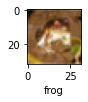

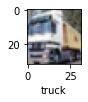

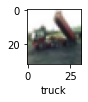

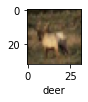

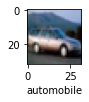

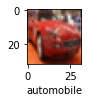

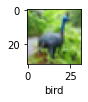

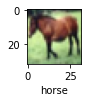

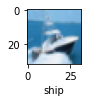

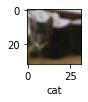

In [ ]:
label_name = meta_data_extract['label_names']

def plot_sample(X, y, index):
    plt.figure(figsize = (5,1))
    plt.imshow(X[index])
    plt.xlabel(label_name[y[index]])

for i in range(0,10):
  plot_sample(X_train, y_train, i)

# Loading Test dataset
Test dataset is is similar in structure as training one, hence , same transformations will be formed

In [ ]:
filename= r'/content/drive/MyDrive/Colab_Notebooks/Project_2/cifar-10-batches-py/test_batch'
test_batch = unpickle(filename)
test_features=test_batch['data']
X_test= test_features.reshape((len(test_features), 3, 32, 32)).transpose(0, 2, 3, 1)
y_test = np.array(test_batch['labels'])
print(type(X_test),X_test.shape,X_test[0].shape,type(y_test),y_test.shape )

<class 'numpy.ndarray'> (10000, 32, 32, 3) (32, 32, 3) <class 'numpy.ndarray'> (10000,)


#Creating Validation dataset
Lets split test dataset into 2 halves and use one half 5000 images as validation set 

In [ ]:
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

In [ ]:
print(X_test.shape,X_val.shape,y_test.shape,y_val.shape )

(5000, 32, 32, 3) (5000, 32, 32, 3) (5000,) (5000,)


# Normalize/Rescaling the dataset

The normalise function converts the input image data, x, into a normalised Numpy array. Without altering the array's shape, the original data's values will be changed to fall between 0 and 1, inclusive. An easy explanation for why normalisation should be carried out has something to do with activation function.

As an illustration, the sigmoid activation function converts an input value to a new value between 0 and 1. The output value quickly reaches the maximum value 1 when the input value is reasonably large. Similar to this, when the input value is a little low, the output value easily reaches the maximum value of 0.

Pixel value of the image falls between 0 to 255.

So, we are scaling the value between 0 to 1  by dividing each value by 255


In [ ]:
def normalize(x):
    x = x.astype('float32')
    x = x/255.0
    return x 
    
X_train = normalize(X_train)
X_test = normalize(X_test)
X_val = normalize(X_val)    

# One hot Encoding

The majority of ML algorithms demand that any input or output variables be numbers. Any categorical data must therefore be converted to integers.
With one-hot, we create a new category column for each categorical value and give it a binary value of 1 or 0. 
A binary vector is used to represent each integer value. The index is denoted by a 1 and all values are zero.Given that the output of our model would provide the probability of the various categories in which a picture should be classified as a prediction. A vector with the same number of elements as the total number of image classes should exist. For instance, CIFAR-10 offers 10 different image classes, so we also require a vector with a 10 size. Each component represents the class-specific prediction probability.

A comparison between the forecast and the ground truth label should also be possible using our model. It implies that the label data's shape should likewise be converted into a vector with a 10x10 size. Instead, we assign the value 1 to the relevant element because label is the actual reality.

Even while this is useful in some ordinal circumstances, some input data lacks ranking for category values, which can cause problems with predictions and poor performance. One hot encoding comes to the rescue at that point.

Our training data is more useful and expressive thanks to one hot encoding, and it is also simple to scale. We can more quickly calculate a probability for our values by using numerical values. For our output values in particular, one hot encoding is chosen since it offers more precise predictions than single labels.
Limitations-
This approach can result in a significant issue (too many predictors) if the original column contains a lot of unique values because it creates a lot of additional variables. One-hot encoding also has the drawback of increasing multicollinearity among the numerous variables, which reduces the model's accuracy.


In [ ]:
# for v in data_batch_1.items():
one_hot_labels = set(data_batch_1['labels']) # One-hot encoding labels
one_hot_labels

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train =to_categorical(y_train , 10)
y_test = to_categorical(y_test , 10)
y_val  = to_categorical(y_val , 10)

In [ ]:
# After one hot encoding
print("y_test Shape: %s and value: %s" % (y_test.shape, y_test[0]))
print("y_train Shape: %s and value: %s" % (y_train.shape, y_train[0]))
print("y_val Shape: %s and value: %s" % (y_val.shape, y_val[0]))

y_test Shape: (5000, 10) and value: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
y_train Shape: (50000, 10) and value: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
y_val Shape: (5000, 10) and value: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Build , Compile , Summarize Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                        

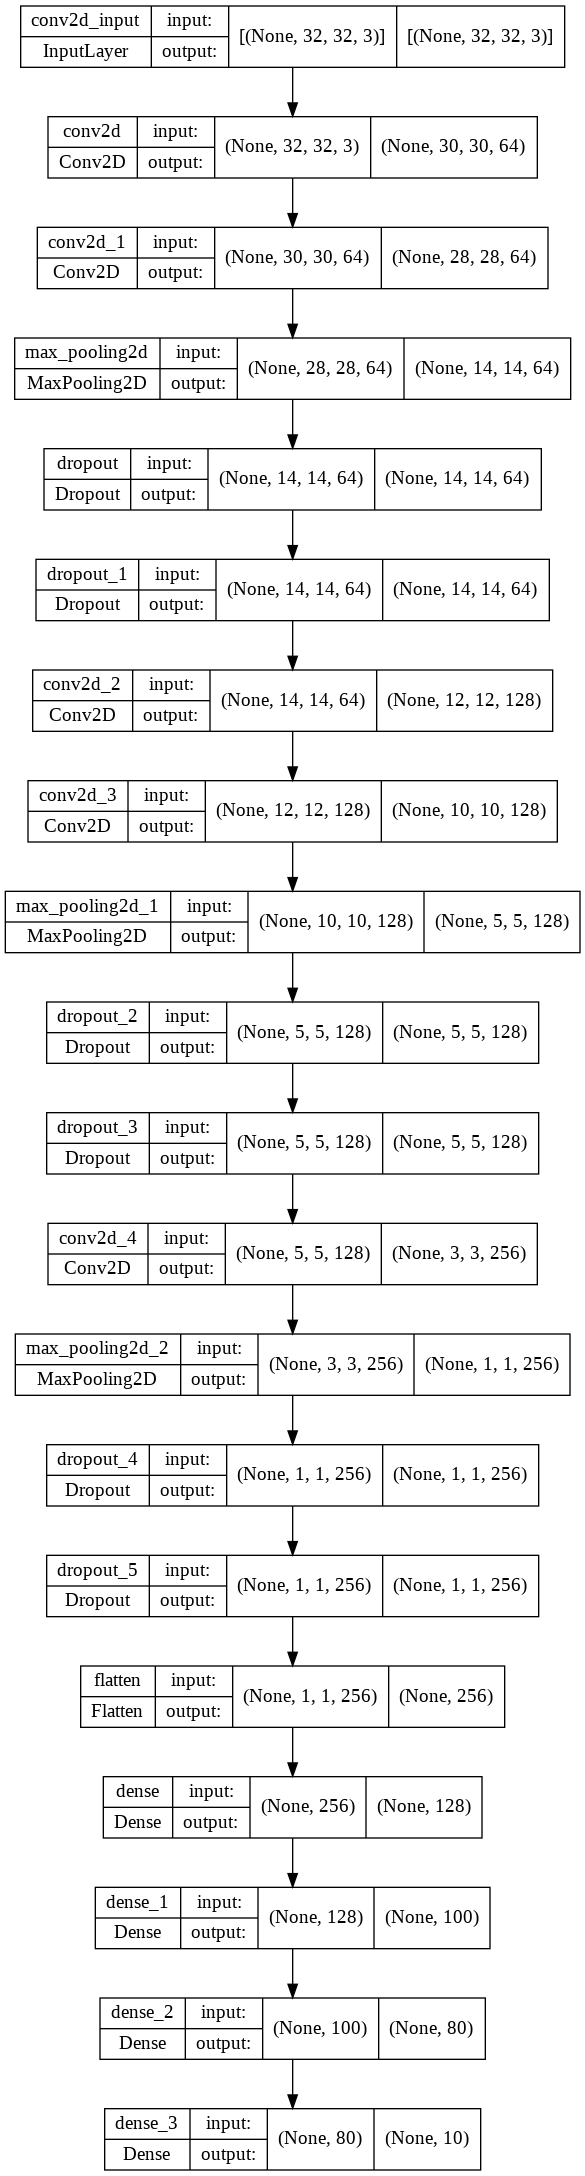

In [ ]:
# Modelling - Model on CNN
import tensorflow as tf
import os
from keras.utils.vis_utils import plot_model
from tensorflow.keras import models, layers
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout,BatchNormalization

# create a sequential model i.e. empty neural network which has no layers in it.
model=tf.keras.Sequential([

#==================== Feature Detection / extraction Block ====================#
# Add first convolutional block  we use Conv2D and for colour images and shape use Conv3D
Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'),
Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'),
MaxPooling2D(pool_size=(2,2)),
Dropout(0.3),
Dropout(0.3),

# Add Second convolutional block
Conv2D(128,(3,3),activation='relu'),
Conv2D(128,(3,3),activation='relu'),
MaxPooling2D(pool_size=(2,2)),
Dropout(0.3),
Dropout(0.3),

# Add Third convolutional block
Conv2D(256,(3,3),activation='relu'),
MaxPooling2D(pool_size=(2,2)),
Dropout(0.3),
Dropout(0.3),

#==================== Transition Block (from feature detection to classification) ====================#
# Add Flatten layer. Flatten simply converts matrics to array
Flatten(input_shape=(32,32)),

#==================== Classification Block ====================#

# Classification segment - fully connected network
# The Dence layer does classification and is deep neural network. Dense layer always accept the array.
Dense(128, activation='relu'),
Dense(100, activation='relu'),
Dense(80, activation='relu'),

# Add the output layer
Dense(10, activation='softmax') # as Output layer in above image. The output layer normally have softmax activation

])

#Compile defines the loss function, the optimizer and the metrics.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

#The summary is textual and includes information about: 
#The layers and their order in the model. The output shape of each layer. The number of parameters (weights) in each layer. The total number of parameters (weights) in the model.
model.summary()

# Ploting the Model
plot_model(model, show_shapes=True)

#Train Model


In [ ]:
checkpoint_path = "/content/drive/MyDrive/Colab_Notebooks/Project_2/cifar-10-batches-py/model_checkpoints/training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=False,monitor='val_accuracy',mode='max',save_best_only=True)
es_callbacks=[tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)]
epoch = 100
r = model.fit(X_train,y_train,epochs=epoch,batch_size=32,verbose=True,validation_data = (X_val , y_val))#,callbacks=[cp_callback,es_callbacks])  # Pass callback to training ,callbacks=[cp_callback]

Epoch 1/100
1563/1563 [==============================] - 332s 213ms/step - loss: 1.3674 - accuracy: 0.5052 - val_loss: 1.2296 - val_accuracy: 0.5628
Epoch 2/100
1563/1563 [==============================] - 332s 213ms/step - loss: 1.2867 - accuracy: 0.5372 - val_loss: 1.1427 - val_accuracy: 0.5986
Epoch 3/100
1563/1563 [==============================] - 331s 212ms/step - loss: 1.2297 - accuracy: 0.5628 - val_loss: 1.0926 - val_accuracy: 0.6264
Epoch 4/100
 499/1563 [========>.....................] - ETA: 3:37 - loss: 1.1994 - accuracy: 0.5753

KeyboardInterrupt: ignored

In [ ]:
epoch_range = range(1, epoch+1)
plt.plot(epoch_range, r.history['accuracy'])
plt.plot(epoch_range, r.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
# Plot training & validation loss values
plt.plot(epoch_range,r.history['loss'])
plt.plot(epoch_range, r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

Observation:
* there is a very little gap between accracy of train and test model i.e. 0.9881 and 0.9826 that means model is almost perfect... very little overfitting.

As long as two models share the same architecture you can share weights between them. So, when restoring a model from weights-only, create a model with the same architecture as the original model and then set its weights. 

Now rebuild a fresh, untrained model and evaluate it on the test set. An untrained model will perform at chance levels (~10% accuracy):

# Load model

In [ ]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Modelling - Model on CNN
import tensorflow as tf
import os
from keras.utils.vis_utils import plot_model
from tensorflow.keras import models, layers
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
# model.save('/content/drive/MyDrive/Colab_Notebooks/Project_2/cifar-10-batches-py/model_checkpoints/training_2/model/my_model.h5') 


In [ ]:
base_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/Project_2/cifar-10-batches-py/model_checkpoints/training_2/model/my_model.h5')


## Evaluating model accuracy

In [ ]:
loss, acc = base_model.evaluate(X_test, y_test, verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

157/157 [==============================] - 1s 4ms/step - loss: 0.6189 - accuracy: 0.7972
Restored model, accuracy: 79.72%


Observation:
Accuracy is approx 80% on test data ,hence it can be considered a good base line model.


# Testing the model & make prediction on test data

In [ ]:
# predicting lable for test_images
predictions=base_model.predict(X_test)
#below are predictions for 1st image (cat)
print("1. Prediction array: %s" % (predictions[0])) # Prediction of the 1st result. It will show the 10 predictions of labels for test image
print("2. Label number having highest confidence in prediction array: %s" % (np.argmax(predictions[0]))) # we will verify that which result for label has highest confidence
print("3. Actual label in dataset: %s" % (y_test[0])) # let us verify what is the label in test_labels.

1. Prediction array: [4.8098691e-06 1.0268490e-04 4.0354417e-04 5.0211174e-04 3.5472724e-04
 7.5384094e-05 9.9847525e-01 9.3908233e-07 1.9966606e-05 6.0551625e-05]
2. Label number having highest confidence in prediction array: 6
3. Actual label in dataset: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Creating a function to verify prediction is True or False




In [ ]:
# creating a funtion which will help to verify the prediction is true of not
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array 
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary) # showing b/w image
  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)  
  if predicted_label == true_label: #setting up label color
    color='blue' # correct then blue colour   
  else:
    color='red' # wrong then red colour
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],  100*np.max(predictions_array), class_names[true_label]),   color=color) 
# function to display bar chart showing whether image prediction is how much correct  
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10), predictions_array, color='gray')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

## Test for single image

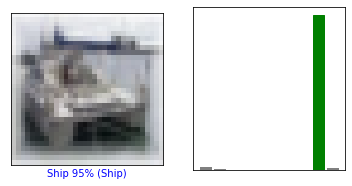

In [ ]:
# call the function

# defining parameters to pass to function
i=12 # image number 56. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()

## Test for single image

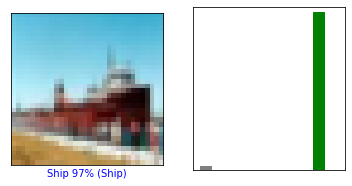

In [ ]:
# call the function

# defining parameters to pass to function
i=7 # image number 5. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()

## Test for single image

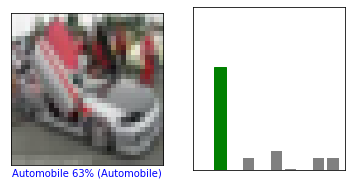

In [ ]:
# call the function

# defining parameters to pass to function
i=6 # image number 12. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()

(32, 32, 3)
(1, 32, 32, 3)
[[8.1832834e-05 3.3246484e-03 2.7160595e-06 1.6849983e-05 1.6529378e-06
  2.8218601e-05 1.7455540e-06 9.1802694e-06 1.7390605e-04 9.9635929e-01]]


9

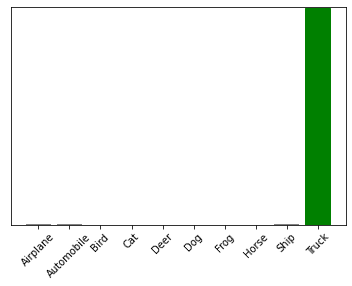

In [ ]:
# verification our prediction on single image

i=4 # image number 0. You may change value of i for play around
img = X_test[i]
print(img.shape)

img=(np.expand_dims(img,0))
print(img.shape)

predictions_single = base_model.predict(img)
print(predictions_single)

plot_value_array(i, predictions,y_test)
_ = plt.xticks(range(10), class_names,rotation=45)

np.argmax(predictions_single[0])

## Verifying several images

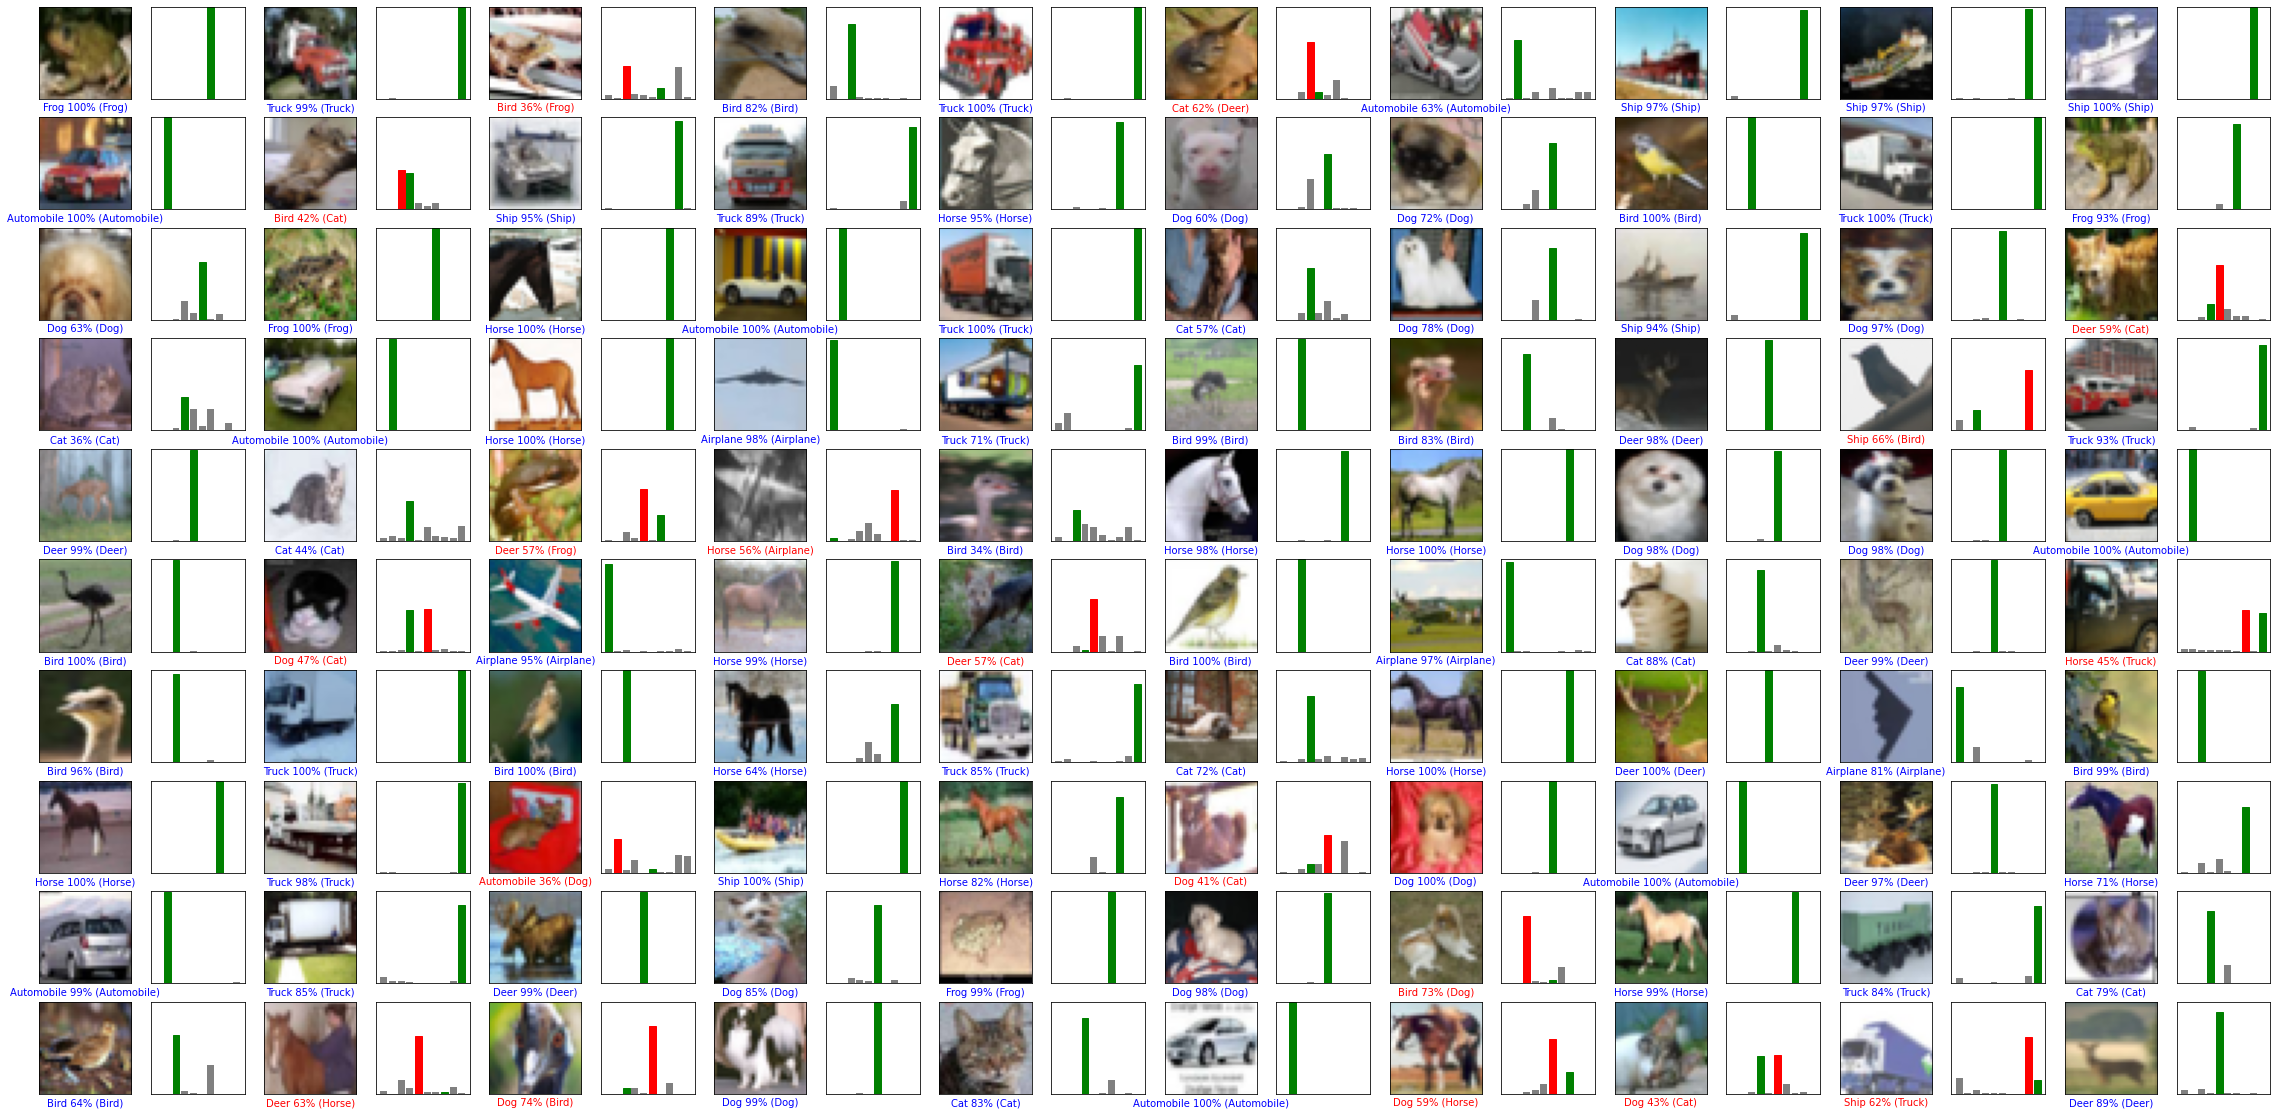

In [ ]:
# verification of several images

num_rows=10
num_cols=10
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

# Creating a dataset of all incorrect predictions

In [ ]:
count=0
y_new= []
X_new= np.zeros((1,32,32, 3))
for i in range(0,5000):
  predicted_label=np.argmax(predictions[i])
  true_label=np.argmax(y_test[i])
  if (predicted_label!=true_label):
    count =count+1
    # print(i,predicted_label,true_label)
    if i == 0:
        X_new[i] = X_test[i]
        y_new = true_label
    else:
    # X_new[i] = np.asarray(np.append(X_new, X_test2[i]))
        y_new=np.asarray(np.append(y_new,true_label ))
        j=1+len(y_new)
        X_new = np.append(X_new, X_test[i]).reshape(j,32,32,3)
        print(i,predicted_label,true_label)
print(count)
# print(type(y_new),len(y_new),print(y_new))

X_new=X_new[1:]

2 2 6
5 3 4
11 2 3
29 4 3
38 8 2
42 4 6
43 7 0
51 5 3
54 4 3
59 7 9
72 1 5
75 5 3
86 2 5
91 4 7
92 5 2
96 5 7
97 5 3
98 8 9
102 3 7
106 2 0
109 8 0
126 2 3
129 4 3
132 4 7
133 5 6
135 2 4
141 2 3
152 8 3
154 4 3
160 9 8
168 6 3
169 6 3
175 2 1
177 2 7
179 8 0
188 2 6
190 2 3
199 5 6
204 5 3
205 4 7
206 4 0
209 5 3
211 5 3
213 5 7
214 8 0
216 8 9
217 0 5
220 3 5
223 4 6
226 0 2
235 4 7
245 3 1
247 1 8
254 6 0
257 2 3
262 6 3
269 5 3
270 9 1
280 8 0
293 5 4
295 8 5
299 5 4
300 4 7
305 4 3
310 1 9
313 6 3
317 2 7
318 5 3
321 5 3
322 3 5
327 2 5
335 2 3
338 8 3
346 4 7
354 4 3
355 0 9
356 4 7
364 2 3
370 3 5
372 3 5
377 6 3
379 8 0
386 7 2
388 4 2
390 4 3
391 0 5
394 6 1
396 3 7
398 8 1
403 1 9
408 5 3
416 8 0
420 2 3
427 4 5
433 4 3
434 4 5
440 8 2
449 2 6
452 8 9
455 6 3
458 5 3
465 8 0
466 8 7
470 4 0
477 2 9
483 5 2
485 5 2
487 5 3
493 8 9
500 9 3
502 0 9
504 5 3
506 2 7
508 1 0
510 4 5
512 4 7
525 5 3
530 7 2
535 3 4
547 2 1
553 2 9
557 3 5
566 9 7
571 8 0
574 7 3
581 5 3
582 4 7
585 

In [ ]:
from tensorflow.keras.utils import to_categorical, plot_model
print("Before one hot encoding, y_new Shape: %s and value: %s" % (y_new.shape, y_new))# Before one hot encoding
y_new=to_categorical(y_new)
print("After one hot encoding ,y_new Shape: %s and value: %s" % (y_new.shape, y_new[0]))# After one hot encoding

Before one hot encoding, y_new Shape: (1014,) and value: [6. 4. 3. ... 0. 5. 5.]
After one hot encoding ,y_new Shape: (1014, 10) and value: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Active Learning 
Retrain the model to have them fitted on wrong predicted images & save the retrained model. Here, Lets take first 100 test images to be retrained

In [ ]:
X_train_new = X_test[:100]
y_train_new = y_test[:100]

In [ ]:
#Current accuracy on this subset 
loss, acc = base_model.evaluate(X_train_new, y_train_new, verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc)) #8 out of 10 images are predicted correctly

4/4 [==============================] - 0s 5ms/step - loss: 0.4752 - accuracy: 0.8300
Restored model, accuracy: 83.00%


#ImageDataGenerator
ImageDataGenerator will be used to apply multiple data augmentation techniques  to avoid overfitting  in the training part.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( rotation_range=15, width_shift_range=0.1, height_shift_range=0.1,horizontal_flip=True,)
datagen.fit(X_train_new)

In [ ]:
base_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/Project_2/cifar-10-batches-py/model_checkpoints/training_2/model/my_model.h5')
base_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_21 (Sequential)  (None, 10)                612574    
                                                                 
 flatten_8 (Flatten)         (None, 10)                0         
                                                                 
 dense_54 (Dense)            (None, 2048)              22528     
                                                                 
 dense_55 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_56 (Dense)            (None, 512)               524800    
                                                                 
 dense_57 (Dense)            (None, 248)               127224    
                                                                 
 dense_61 (Dense)            (None, 10)               

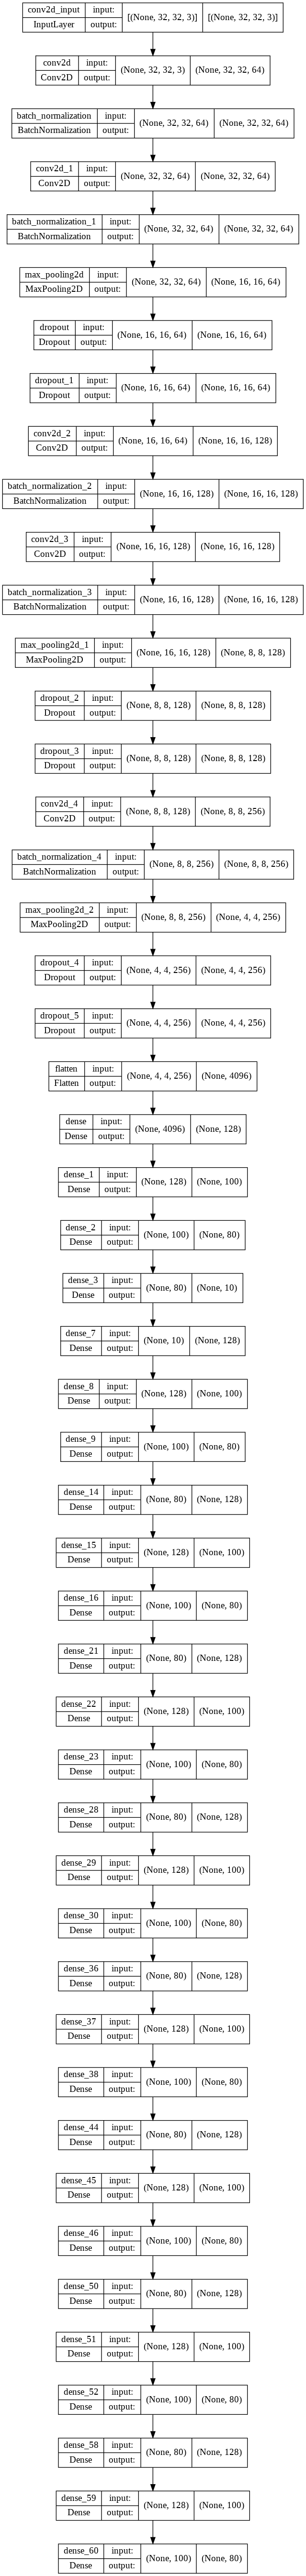

In [ ]:
retrain_model=tf.keras.Sequential()

# base_model.trainable = False
for layer in base_model.layers:
        layer.trainable=False
retrain_model.add(base_model)        
# x = base_model(x, training=False)
# X_train_new= np.expand_dims(X_train_new, axis=0)
# retrain_model.add(layers.MaxPooling2D())
# retrain_model.add(Dropout(0.5))
# retrain_model.add(Dropout(0.5))
# retrain_model.add(Flatten())
retrain_model.add(layers.Flatten(input_shape=(32,32))) 
retrain_model.add(Dense(2048, activation='relu'))
retrain_model.add(Dense(1024, activation='relu'))
retrain_model.add(Dense(512, activation='relu'))
retrain_model.add(Dense(248, activation='relu'))
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(100, activation='relu')) 
model.add(layers.Dense(80, activation='relu'))  
retrain_model.add(Dense(10, activation='softmax'))
retrain_model.summary()
plot_model(model, show_shapes=True)

## Build a model

Now let's built a model that follows the blueprint we've explained earlier.

Note that:

- We add a `Rescaling` layer to scale input values (initially in the `[0, 255]`
 range) to the `[-1, 1]` range.
- We add a `Dropout` layer before the classification layer, for regularization.
- We make sure to pass `training=False` when calling the base model, so that
it runs in inference mode, so that batchnorm statistics don't get updated
even after we unfreeze the base model for fine-tuning.

In [ ]:
epoch = 50
checkpoint_path = "/content/drive/MyDrive/Colab_Notebooks/Project_2/cifar-10-batches-py/model_checkpoints/training_2/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=False,monitor='val_accuracy',mode='max',save_best_only=True)

# update model on new data only with a smaller learning rate
opt = tf.keras.optimizers.Adam(1e-3)
# compile the model
retrain_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# r = retrain_model.fit(datagen.flow(X_train_new , y_train_new , batch_size = 32), epochs = epoch , validation_data = (X_val , y_val), verbose = True, callbacks=[cp_callback])
r = retrain_model.fit(X_train_new, y_train_new, epochs= epoch, batch_size=32, validation_data = (X_val , y_val), verbose = True,callbacks=[cp_callback])

Epoch 1/50
4/4 [==============================] - 6s 2s/step - loss: 2.2134 - accuracy: 0.5000 - val_loss: 1.9267 - val_accuracy: 0.6446
Epoch 2/50
4/4 [==============================] - 5s 2s/step - loss: 1.6865 - accuracy: 0.6700 - val_loss: 1.3472 - val_accuracy: 0.6458
Epoch 3/50
4/4 [==============================] - 5s 2s/step - loss: 1.0751 - accuracy: 0.7400 - val_loss: 0.8796 - val_accuracy: 0.8036
Epoch 4/50
4/4 [==============================] - 1s 440ms/step - loss: 0.8033 - accuracy: 0.7900 - val_loss: 0.8258 - val_accuracy: 0.7978
Epoch 5/50
4/4 [==============================] - 1s 219ms/step - loss: 0.8244 - accuracy: 0.7500 - val_loss: 0.8482 - val_accuracy: 0.7980
Epoch 6/50
4/4 [==============================] - 1s 218ms/step - loss: 0.7455 - accuracy: 0.8000 - val_loss: 0.8784 - val_accuracy: 0.7852
Epoch 7/50
4/4 [==============================] - 1s 219ms/step - loss: 0.8736 - accuracy: 0.7700 - val_loss: 0.8737 - val_accuracy: 0.7942
Epoch 8/50
4/4 [=============

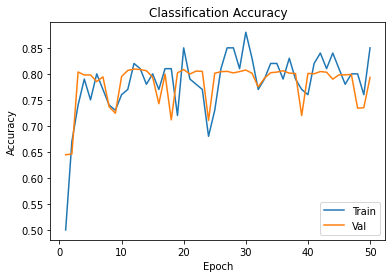

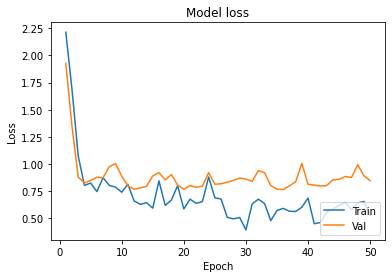

In [ ]:
epoch_range = range(1, epoch+1)
plt.plot(epoch_range, r.history['accuracy'])
plt.plot(epoch_range, r.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
# Plot training & validation loss values
plt.plot(epoch_range,r.history['loss'])
plt.plot(epoch_range, r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
test_loss, test_acc = retrain_model.evaluate(X_test, y_test)
print("accuracy:", test_acc)

157/157 [==============================] - 1s 5ms/step - loss: 0.8856 - accuracy: 0.7912
accuracy: 0.7911999821662903


In [ ]:
test_loss, test_acc = retrain_model.evaluate(X_train_new, y_train_new)
print("accuracy:", test_acc)

4/4 [==============================] - 0s 6ms/step - loss: 0.4066 - accuracy: 0.8700
accuracy: 0.8700000047683716


#Save Retrained model

In [ ]:
 retrain_model.save('/content/drive/MyDrive/Colab_Notebooks/Project_2/cifar-10-batches-py/model_checkpoints/training_2/model/retrain_X_test100_79_model.h5') 

In [ ]:
retrain_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/Project_2/cifar-10-batches-py/model_checkpoints/training_2/model/retrain_X_test100_79_model.h5')

## Do a round of fine-tuning of the entire model

Finally, let's unfreeze the base model and train the entire model end-to-end with a low
 learning rate.

Importantly, although the base model becomes trainable, it is still running in
inference mode since we passed `training=False` when calling it when we built the
model. This means that the batch normalization layers inside won't update their batch
statistics. If they did, they would wreck havoc on the representations learned by the
 model so far.
 Once your model has converged on the new data, you can try to unfreeze all or part of the base model and retrain the whole model end-to-end with a very low learning rate.

This is an optional last step that can potentially give you incremental improvements. It could also potentially lead to quick overfitting -- keep that in mind.

It is critical to only do this step after the model with frozen layers has been trained to convergence. If you mix randomly-initialized trainable layers with trainable layers that hold pre-trained features, the randomly-initialized layers will cause very large gradient updates during training, which will destroy your pre-trained features.

It's also critical to use a very low learning rate at this stage, because you are training a much larger model than in the first round of training, on a dataset that is typically very small. As a result, you are at risk of overfitting very quickly if you apply large weight updates. Here, you only want to readapt the pretrained weights in an incremental way.

This is how to implement fine-tuning of the whole base model:

In [ ]:
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
base_model.trainable = True
retrain_model.summary()
retrain_model.compile(     optimizer=tf.keras.optimizers.Adam(1e-5),  # Low learning rate
loss='categorical_crossentropy', metrics=['accuracy'])
epoch = 15
r = retrain_model.fit(X_train_new , y_train_new , batch_size = 32, epochs = epoch , validation_data = (X_val , y_val), verbose = True)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_21 (Sequential)  (None, 10)                612574    
                                                                 
 flatten_8 (Flatten)         (None, 10)                0         
                                                                 
 dense_54 (Dense)            (None, 2048)              22528     
                                                                 
 dense_55 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_56 (Dense)            (None, 512)               524800    
                                                                 
 dense_57 (Dense)            (None, 248)               127224    
                                                                 
 dense_61 (Dense)            (None, 10)               

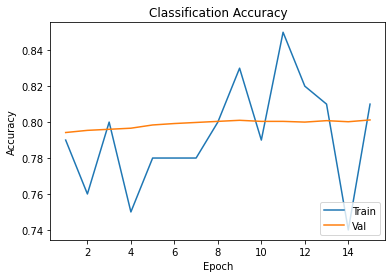

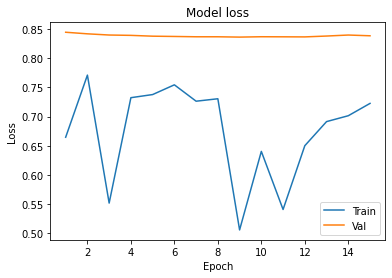

In [ ]:
epoch_range = range(1, epoch+1)
plt.plot(epoch_range, r.history['accuracy'])
plt.plot(epoch_range, r.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
# Plot training & validation loss values
plt.plot(epoch_range,r.history['loss'])
plt.plot(epoch_range, r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
test_loss, test_acc = retrain_model.evaluate(X_test, y_test)
print("accuracy:", test_acc)

157/157 [==============================] - 1s 5ms/step - loss: 0.8741 - accuracy: 0.7958
accuracy: 0.795799970626831


In [ ]:
test_loss, test_acc = retrain_model.evaluate(X_train_new, y_train_new)
print("accuracy:", test_acc)

4/4 [==============================] - 0s 6ms/step - loss: 0.3599 - accuracy: 0.8900
accuracy: 0.8899999856948853


# Observation
1. Getting good results on using transfer learning on existing model & later doing finetuning
2. Acuuracy improvement is directly proportional to amount of data used in transfer learning

In [ ]:
from sklearn.model_selection import train_test_split
X_train_new, X_test, y_train_new,  y_test = train_test_split(X_test, y_test, test_size = 0.98, random_state = 0)

In [ ]:
print(X_train_new.shape,X_test.shape,y_train_new.shape,y_test.shape )

(100, 32, 32, 3) (4900, 32, 32, 3) (100,) (4900,)


In [ ]:
from tensorflow.keras.utils import to_categorical
print("Before one hot encoding, y_new Shape: %s and value: %s" % (y_train_new.shape, y_train_new))# Before one hot encoding
y_train_new=to_categorical(y_train_new)
print("After one hot encoding ,y_new Shape: %s and value: %s" % (y_train_new.shape, y_train_new[0]))# After one hot encoding

Before one hot encoding, y_new Shape: (100,) and value: [1 2 6 3 1 6 7 6 5 5 1 1 2 6 7 8 0 3 8 4 2 0 3 9 3 0 7 9 1 0 1 8 3 5 8 3 0
 9 7 3 2 1 4 8 6 4 1 9 8 3 4 7 2 6 9 5 9 5 8 4 0 0 7 5 8 8 2 4 2 4 2 4 6 9
 2 5 5 4 6 2 4 9 9 2 9 4 6 8 8 6 3 4 5 3 2 6 4 4 4 7]
After one hot encoding ,y_new Shape: (100, 10) and value: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(X_train.shape, X_train[0])

# X_train_new = np.append(X_train, X_train_new).reshape(,32,32,3)
X_train_new = np.concatenate((X_train, X_train_new), axis = 0)
print(X_train_new.shape, X_train_new[0])

In [ ]:
y_train_new.shape,y_train.shape
y_train_new = np.concatenate((y_train, y_train_new), axis = 0)
print(y_train_new.shape, y_train_new[0])

(50100, 10) [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
print(y_val.shape, y_val[0])

(5000, 10) [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# checkpoint_path = "/content/drive/MyDrive/Colab_Notebooks/Project_2/cifar-10-batches-py/model_checkpoints/training_1/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=False,monitor='val_accuracy',mode='max',save_best_only=True)
epoch = 30
r = model.fit(X_train_new,y_train_new,epochs=epoch,batch_size=32,verbose=True,validation_data = (X_val , y_val))  # Pass callback to training ,callbacks=[cp_callback]

Epoch 1/30
1566/1566 [==============================] - 16s 10ms/step - loss: 1.5067 - accuracy: 0.6327 - val_loss: 5.4495 - val_accuracy: 0.1192
Epoch 2/30
1566/1566 [==============================] - 16s 10ms/step - loss: 1.4193 - accuracy: 0.6551 - val_loss: 5.8130 - val_accuracy: 0.1078
Epoch 3/30
1566/1566 [==============================] - 16s 10ms/step - loss: 1.3967 - accuracy: 0.6573 - val_loss: 14.6594 - val_accuracy: 0.0998
Epoch 4/30
1566/1566 [==============================] - 17s 11ms/step - loss: 1.3796 - accuracy: 0.6621 - val_loss: 7.3871 - val_accuracy: 0.1406
Epoch 5/30
1566/1566 [==============================] - 16s 10ms/step - loss: 1.3706 - accuracy: 0.6667 - val_loss: 8.8434 - val_accuracy: 0.1482
Epoch 6/30
1566/1566 [==============================] - 16s 10ms/step - loss: 1.3607 - accuracy: 0.6714 - val_loss: 5.3356 - val_accuracy: 0.1202
Epoch 7/30
1566/1566 [==============================] - 16s 10ms/step - loss: 1.3524 - accuracy: 0.6734 - val_loss: 5.9321 

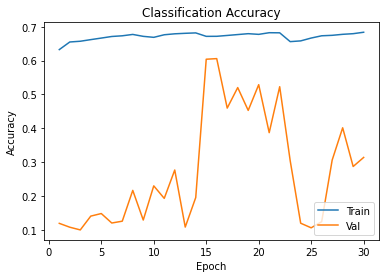

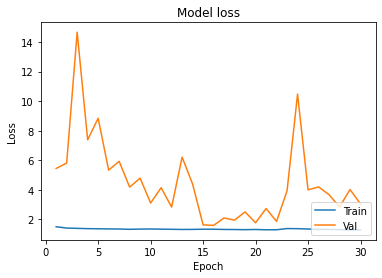

In [ ]:
epoch_range = range(1, epoch+1)
plt.plot(epoch_range, r.history['accuracy'])
plt.plot(epoch_range, r.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
# Plot training & validation loss values
plt.plot(epoch_range,r.history['loss'])
plt.plot(epoch_range, r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
loss, acc = base_model.evaluate(X_test, y_test, verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

157/157 [==============================] - 1s 4ms/step - loss: 0.6189 - accuracy: 0.7972
Restored model, accuracy: 79.72%


In [ ]:
# predicting lable for test_images
predictions=base_model.predict(X_test)
#below are predictions for 1st image (cat)
print("1. Prediction array: %s" % (predictions[0])) # Prediction of the 1st result. It will show the 10 predictions of labels for test image
print("2. Label number having highest confidence in prediction array: %s" % (np.argmax(predictions[0]))) # we will verify that which result for label has highest confidence
print("3. Actual label in dataset: %s" % (y_test[0])) # let us verify what is the label in test_labels.

1. Prediction array: [4.8098691e-06 1.0268490e-04 4.0354417e-04 5.0211174e-04 3.5472724e-04
 7.5384094e-05 9.9847525e-01 9.3908233e-07 1.9966606e-05 6.0551625e-05]
2. Label number having highest confidence in prediction array: 6
3. Actual label in dataset: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


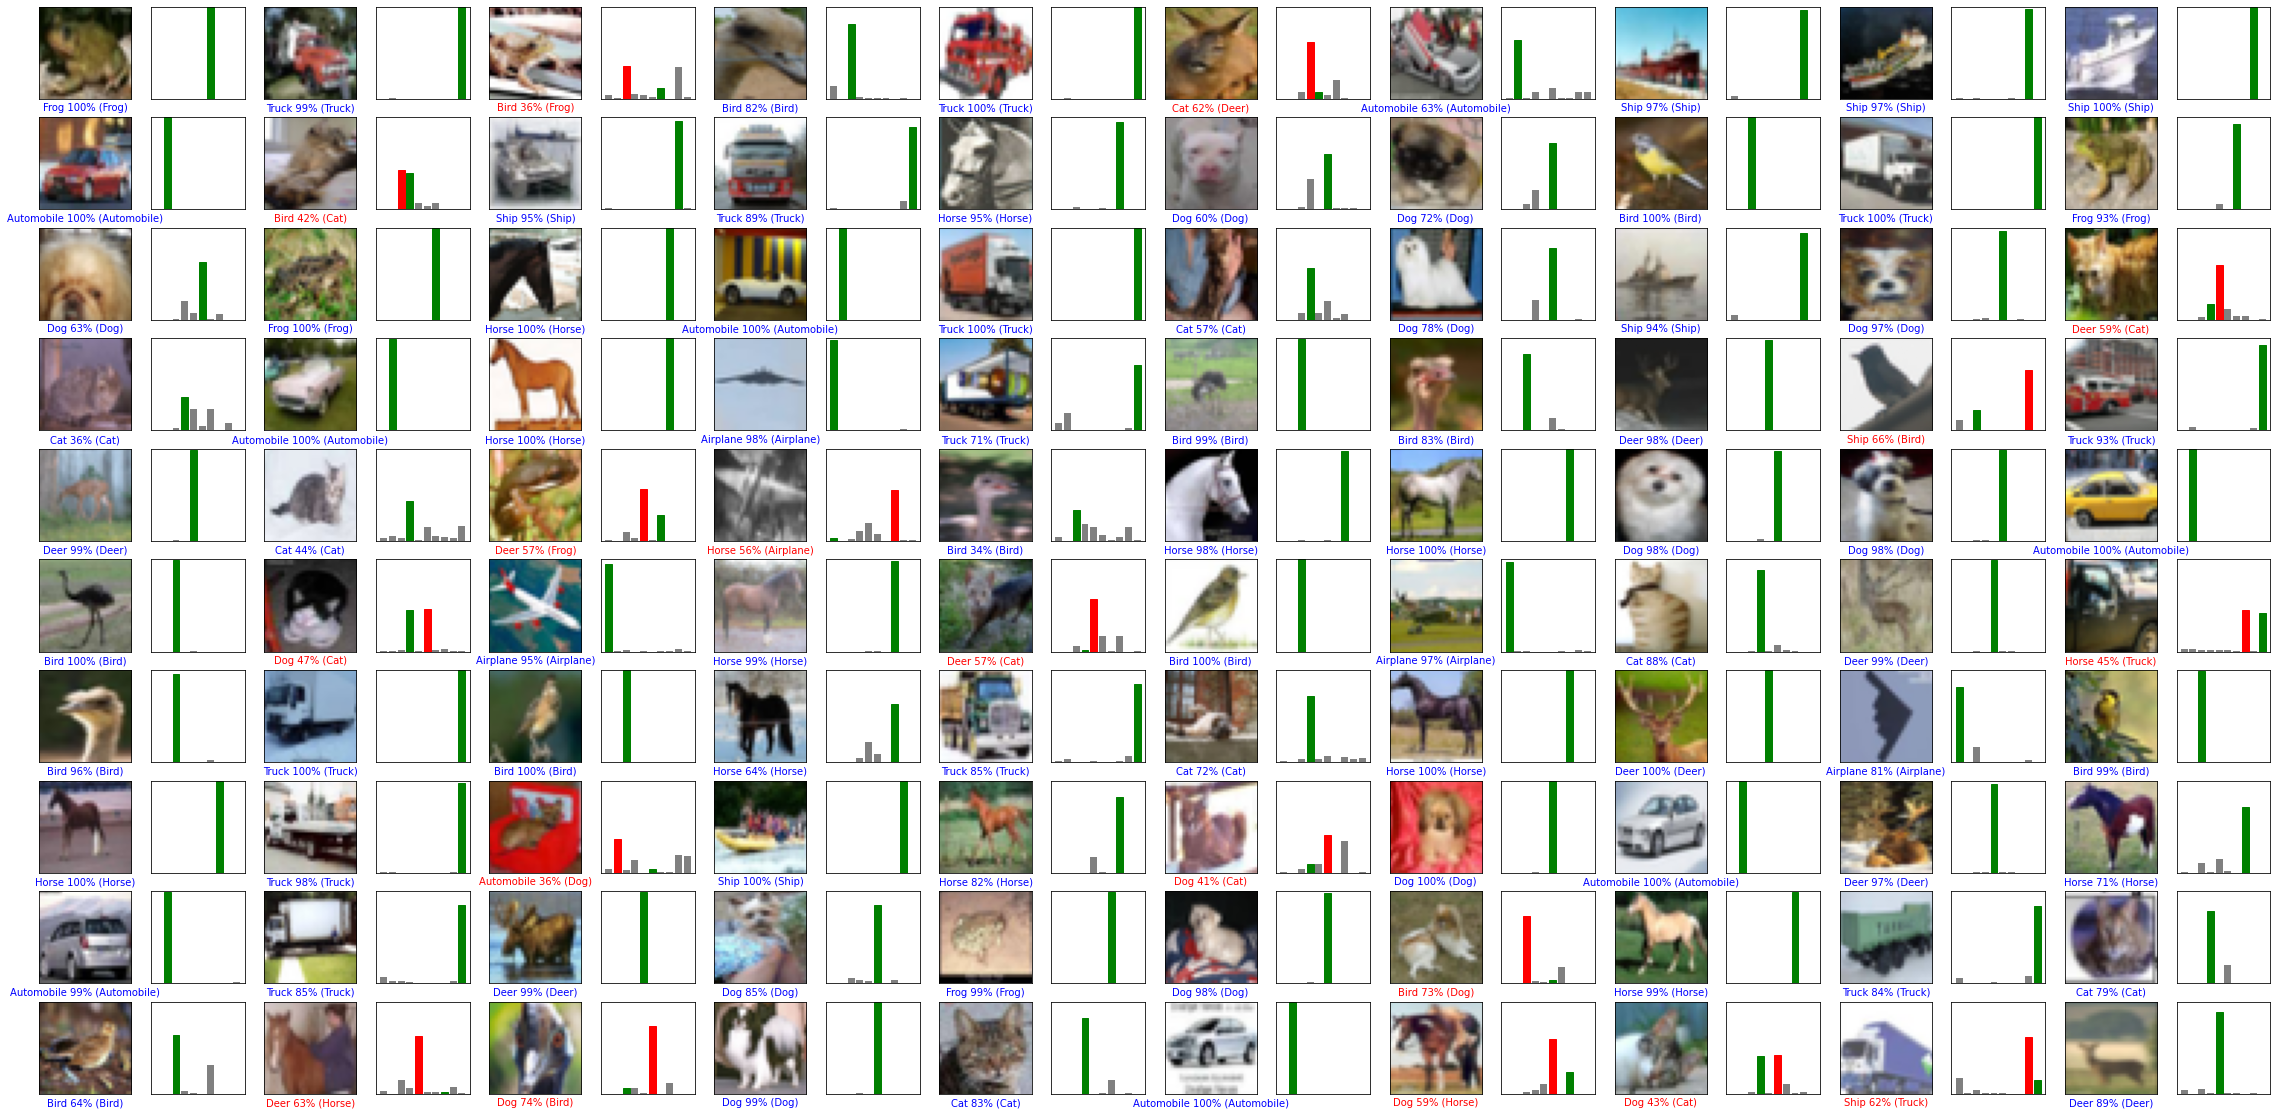

In [ ]:
# verification of several images

num_rows=10
num_cols=10
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

#VGG16

In [ ]:
from keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (32, 32, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# Since we don’t have to train all the layers, we make them non_trainable:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten(input_shape=(32,32))(base_model.output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)
# Add a final sigmoid layer with 10 node for classification output
x = layers.Dense(10, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)
model.summary()
model.compile(optimizer = tf.keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint_path = "/content/drive/MyDrive/Colab_Notebooks/Project_2/cifar-10-batches-py/model_checkpoints/training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=False,monitor='val_accuracy',mode='max',save_best_only=True)
es_callbacks=[tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)]
epoch = 50
# r = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)
r = model.fit(X_train, y_train, epochs= epoch,steps_per_epoch = 100, batch_size=32, validation_data = (X_val , y_val), verbose = True,callbacks=[es_callbacks])

In [ ]:
model.save('/content/drive/MyDrive/Colab_Notebooks/Project_2/cifar-10-batches-py/model_checkpoints/training_2/model/VGG16_X_train_model.h5') 

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/Project_2/cifar-10-batches-py/model_checkpoints/training_2/model/VGG16_X_train_model.h5')

In [ ]:
epoch = 500
es_callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, verbose=1)]
model.compile(optimizer = tf.keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
r = model.fit(X_train, y_train, epochs= epoch, batch_size=32, steps_per_epoch=100,validation_data = (X_val , y_val), verbose = True,callbacks=[es_callbacks])

Epoch 1/500
100/100 [==============================] - 61s 605ms/step - loss: 1.1285 - accuracy: 0.6016 - val_loss: 1.1663 - val_accuracy: 0.6096
Epoch 2/500
100/100 [==============================] - 59s 593ms/step - loss: 1.1262 - accuracy: 0.6062 - val_loss: 1.1738 - val_accuracy: 0.6128
Epoch 3/500
100/100 [==============================] - 59s 593ms/step - loss: 1.1543 - accuracy: 0.5972 - val_loss: 1.1668 - val_accuracy: 0.6102
Epoch 4/500
100/100 [==============================] - 59s 595ms/step - loss: 1.1438 - accuracy: 0.6044 - val_loss: 1.1646 - val_accuracy: 0.6092
Epoch 5/500
100/100 [==============================] - 59s 593ms/step - loss: 1.1202 - accuracy: 0.6103 - val_loss: 1.1688 - val_accuracy: 0.6068
Epoch 6/500
100/100 [==============================] - 59s 594ms/step - loss: 1.1469 - accuracy: 0.5925 - val_loss: 1.1640 - val_accuracy: 0.6094
Epoch 7/500
100/100 [==============================] - 59s 593ms/step - loss: 1.1674 - accuracy: 0.5856 - val_loss: 1.1615 -

#RESNET

In [ ]:
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(input_shape = (32, 32, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet',pooling='max')
for layer in base_model.layers:
    layer.trainable = False


94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
# Flatten the output layer to 1 dimension
# x = layers.Flatten(input_shape=(32,32))(base_model.output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(base_model.output)
# Add a dropout rate of 0.5
x = layers.Dropout(0.3)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
# Add a final sigmoid layer with 10 node for classification output
x = layers.Dense(10, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)
model.summary()
model.compile(optimizer = tf.keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint_path = "/content/drive/MyDrive/Colab_Notebooks/Project_2/cifar-10-batches-py/model_checkpoints/training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=False,monitor='val_accuracy',mode='max',save_best_only=True)
es_callbacks=[tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)]
epoch = 300
# r = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)
r = model.fit(X_train, y_train, epochs= epoch, batch_size=32, validation_data = (X_val , y_val), verbose = True,callbacks=[es_callbacks])

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
model.save('/content/drive/MyDrive/Colab_Notebooks/Project_2/cifar-10-batches-py/model_checkpoints/training_2/model/RESNET_X_train_model.h5') 

# InceptionV3

In [ ]:
for img in X_train:
  rsize = np.asarray(img.resize((75,75)).astype(float32))
  if img == 0:
    X_train_75 = rsize
  else:
    X_train_75 = np.append(X_train_75, rsize, axis=0)
print(len(X_train_75))

ValueError: ignored

In [ ]:
import numpy as np
from keras.datasets import cifar10
import cv2
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


data_upscaled = np.zeros(50000, 3, 227, 227)

for i, img in enumerate(X_train):

    im = np.transpose(img, (1, 2, 0))

    large_img = cv2.resize(im, dsize=(227, 227), interpolation=cv2.INTER_CUBIC)

    data_upscaled[i] = np.transpose(large_img, (2, 0, 1))
X_train =  data_upscaled   

ValueError: ignored

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (75, 75, 3), include_top = False, weights = 'imagenet',pooling='max')
for layer in base_model.layers:
    layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer with 1 node for classification output
# x = layers.Dense(1, activation='sigmoid')(x)

# x = layers.Flatten(input_shape=(32,32))(base_model.output)
# Add a fully connected layer with 512 hidden units and ReLU activation
# x = layers.Dense(512, activation='relu')(base_model.output)
# Add a dropout rate of 0.5
# x = layers.Dropout(0.3)(x)
# Add a final sigmoid layer with 10 node for classification output
x = layers.Dense(10, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)
model.summary()
model.compile(optimizer = tf.keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
# checkpoint_path = "/content/drive/MyDrive/Colab_Notebooks/Project_2/cifar-10-batches-py/model_checkpoints/training_2/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=False,monitor='val_accuracy',mode='max',save_best_only=True)
es_callbacks=[tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)]
epoch = 300
# r = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)
r = model.fit(X_train, y_train, epochs= epoch, batch_size=32, validation_data = (X_val , y_val), verbose = True,callbacks=[es_callbacks])

87924736/87910968 [==============================] - 1s 0us/step
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 37, 37, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d_5[0][0]']               
 alization)                                                                                       
                                                                                                  
 activation (Activation)   

ValueError: ignored

# EfficientNet

In [ ]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.8 MB/s 


In [ ]:
import tensorflow.keras.applications.efficientnet as efn
base_model = efn.EfficientNetB0(input_shape = (32, 32, 3), include_top = False, weights = 'imagenet')
model=tensorflow.keras.Sequential()
for layer in base_model.layers:
    layer.trainable = False
model.add(base_model)    
# model.add(Flatten(input_shape=(32,32)))
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer = tf.keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
# checkpoint_path = "/content/drive/MyDrive/Colab_Notebooks/Project_2/cifar-10-batches-py/model_checkpoints/training_2/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=False,monitor='val_accuracy',mode='max',save_best_only=True)
es_callbacks=[tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)]
epoch = 300
# r = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)
r = model.fit(X_train, y_train, epochs= epoch, batch_size=32, validation_data = (X_val , y_val), verbose = True,callbacks=[es_callbacks])

NameError: ignored